In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
dataset = pd.read_csv("/content/Social_Network_Ads.csv")

In [ ]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
X = dataset[['Age','EstimatedSalary']]
y = dataset['Purchased']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc_X = StandardScaler()

In [ ]:
X_train = sc_X.fit_transform(X_train)

In [ ]:
X_test = sc_X.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(random_state=0)

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(y_test,pred))

[[61  2]
 [12 25]]


In [ ]:
# print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100



In [ ]:
from matplotlib.colors import ListedColormap

In [ ]:
X_set , y_set = X_train, y_train

In [ ]:
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step = 0.01),
                     np.arange(start = X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step = 0.01)     )

Text(0, 0.5, 'Estimated Salary')

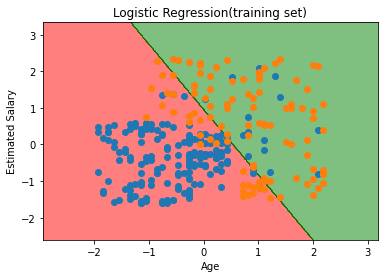

In [ ]:
plt.contourf(X1,X2,lr.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.5,cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],cmap=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression(training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

Text(0, 0.5, 'Estimated Salary')

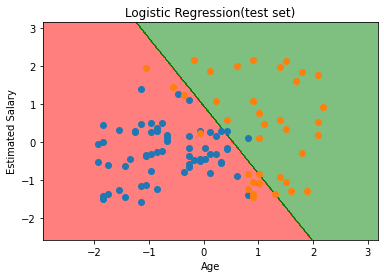

In [ ]:
X_set , y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step = 0.01),
                     np.arange(start = X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step = 0.01)     )
plt.contourf(X1,X2,lr.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.5,cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],cmap=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression(test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')